In [2]:
from sklearn.datasets import fetch_openml
import numpy as np

# Load MNIST data
mnist = fetch_openml('mnist_784', version=1)

#Scale to (0, 1)
images = (mnist['data'].astype(np.float32)).to_numpy() / 255.0
labels = mnist['target'].astype(np.int64)

In [3]:
import sys
import os

# Useful only to use the local version of mmd_critic located in
# ../mmd_critic/
sys.path.append(os.path.abspath('..'))

In [24]:
from mmd_critic import MMDCritic
from mmd_critic.kernels import RBFKernel

critic = MMDCritic(images[:15000], RBFKernel(2.5), RBFKernel(0.025))

In [25]:
protos = critic.select_prototypes(40)

In [26]:
import matplotlib.pyplot as plt

def plot_mnist(images, num_images=10):
    grid_size = int(np.sqrt(num_images))
    
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, ax in enumerate(axes.flat):
        if i < num_images:
            image = images[i].reshape(28, 28)
            ax.imshow(image, cmap='gray')
            
            ax.set_xticks([])
            ax.set_yticks([])

    plt.show()


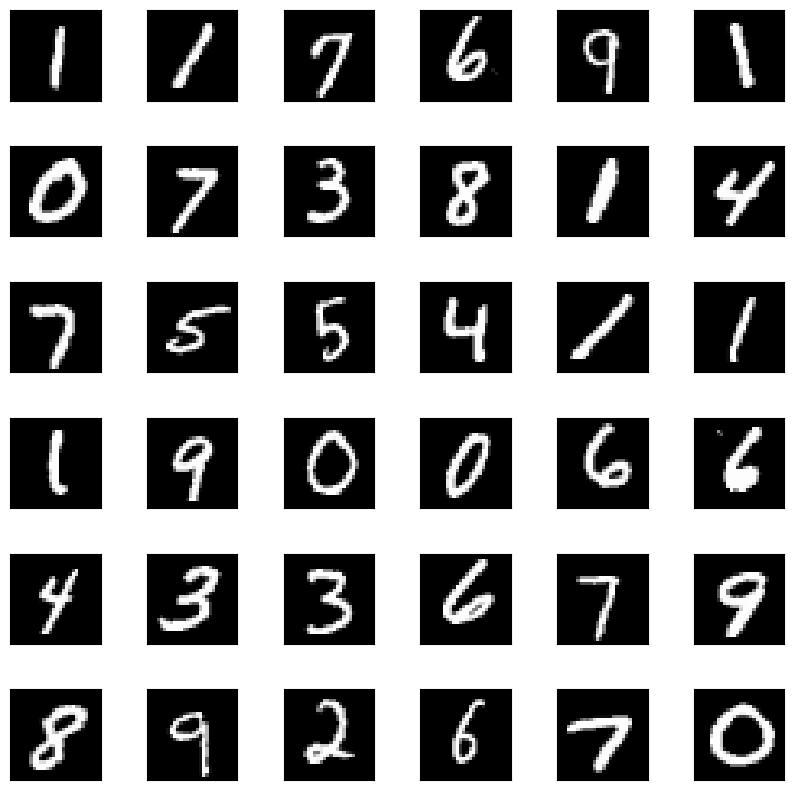

In [27]:
plot_mnist(protos, len(protos))

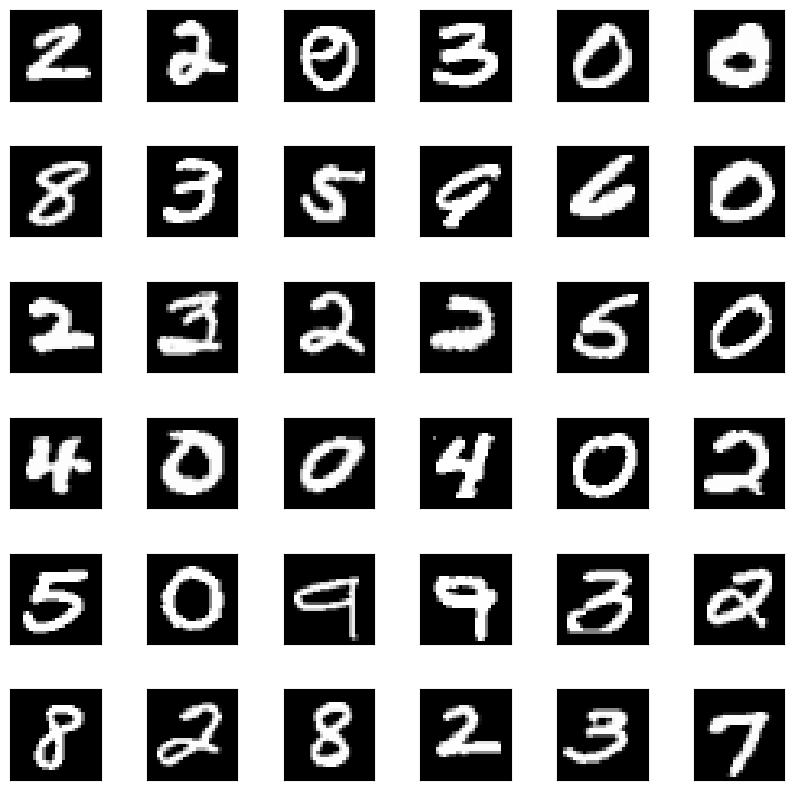

In [28]:
criticisms = critic.select_criticisms(40, protos)
plot_mnist(criticisms, len(criticisms))